In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
from util import HISTORICAL_FILE, HISTORICAL_DB_KEEP_OUT, RESOURCE_DIR, IMAGES_DIR

In [2]:
df = pd.read_excel(HISTORICAL_FILE, keep_default_na=False)
#reads projects from Excel file

len(df)
df.head()

,owner,name,domain,sha1,part_commit,date_commit,isLast,SapHana,Realm,SAP SQL Anywhere,...,ClickHouse,Kdb+,Virtuoso-NoSql,HBase,Firebird,Cassandra,Couchbase,Etcd,PostGIS,Redis
0,Activiti,Activiti,Enterprise Resource Planning,7262dc3913045001cbc658a8474e9d295980c345,1,2010-07-14 06:36:18+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Activiti,Activiti,Enterprise Resource Planning,38b284602be9dcb6b4253cfa1c2f9420c002b56a,2,2010-08-03 08:31:19+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Activiti,Activiti,Enterprise Resource Planning,fbcdc18a66e7f7960a7ed966f87b1527c5c7551a,3,2010-09-02 09:45:24+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Activiti,Activiti,Enterprise Resource Planning,8d05dda18ce4c5db6f30cf01d7e0c2059b1a5388,4,2010-09-16 15:33:33+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Activiti,Activiti,Enterprise Resource Planning,a789ba2b30383777b4d0d81bbc62a90a24dbb032,5,2010-09-23 13:38:28+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Combining the heuristics of Multimodel DBs (Ignite and Virtuoso)

In [3]:
df.columns

Index(['owner', 'name', 'domain', 'sha1', 'part_commit', 'date_commit',
       'isLast', 'SapHana', 'Realm', 'SAP SQL Anywhere', 'FileMaker',
       'Virtuoso', 'ArangoDB', 'Informix', 'HyperSQL', 'CouchDB', 'Riak KV',
       'Ignite', 'Virtuoso-Sql', 'Neo4j', 'Singlestore', 'Snowflake',
       'Ignite-Sql', 'MarkLogic', 'Hazelcast', 'GoogleCloudFilestore',
       'Influx DB', 'H2', 'Ignite-NoSql', 'Interbase', 'Teradata', 'Oracle',
       'Impala', 'Microsoft Azure CosmosDB', 'MySQL_Maria DB', 'MS Access',
       'Microsoft Azure Table Storage', 'Aerospike', 'IBM DB2', 'DynamoDB',
       'Vertica', 'Ingres', 'MongoDB',
       'MS SQL Server_Microsoft Azure SQL Database', 'Google Cloud Datastore',
       'Firebase Realtime', 'SQLite', 'PostgreSQL_ CockroachDB',
       'SAP Adaptive Server', 'ClickHouse', 'Kdb+', 'Virtuoso-NoSql', 'HBase',
       'Firebird', 'Cassandra', 'Couchbase', 'Etcd', 'PostGIS', 'Redis'],
      dtype='object')

In [4]:
df["Join_Ignite-Sql"] = df["Ignite"] +  df["Ignite-Sql"]
df["Join_Ignite-NoSql"] = df["Ignite"] +  df["Ignite-NoSql"]
#df["Join_MarkLogic-Sql"] = df["MarkLogic"] +  df["MarkLogic-Sql"]
#df["Join_MarkLogic-NoSql"] = df["MarkLogic"] +  df["MarkLogic-NoSql"]
df["Join_Virtuoso-Sql"] = df["Virtuoso"] +  df["Virtuoso-Sql"] #(Não virtuoso SQL como resultado)
df["Join_Virtuoso-NoSql"] = df["Virtuoso"] +  df["Virtuoso-NoSql"]

df.rename(columns={'MySQL_Maria DB': 'MySQL'}, inplace=True)
df.rename(columns={'PostgreSQL_ CockroachDB': 'PostgreSQL'}, inplace=True)
df.rename(columns={'MS SQL Server_Microsoft Azure SQL Database': 'MS SQL Server'}, inplace=True)
#df.rename(columns={'Join_Ignite-Sql': 'Ignite-Sql'}, inplace=True)
#df.rename(columns={'Join_Ignite-NoSql': 'Ignite-NoSql'}, inplace=True)


df

,owner,name,domain,sha1,part_commit,date_commit,isLast,SapHana,Realm,SAP SQL Anywhere,...,Firebird,Cassandra,Couchbase,Etcd,PostGIS,Redis,Join_Ignite-Sql,Join_Ignite-NoSql,Join_Virtuoso-Sql,Join_Virtuoso-NoSql
0,Activiti,Activiti,Enterprise Resource Planning,7262dc3913045001cbc658a8474e9d295980c345,1,2010-07-14 06:36:18+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Activiti,Activiti,Enterprise Resource Planning,38b284602be9dcb6b4253cfa1c2f9420c002b56a,2,2010-08-03 08:31:19+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Activiti,Activiti,Enterprise Resource Planning,fbcdc18a66e7f7960a7ed966f87b1527c5c7551a,3,2010-09-02 09:45:24+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Activiti,Activiti,Enterprise Resource Planning,8d05dda18ce4c5db6f30cf01d7e0c2059b1a5388,4,2010-09-16 15:33:33+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Activiti,Activiti,Enterprise Resource Planning,a789ba2b30383777b4d0d81bbc62a90a24dbb032,5,2010-09-23 13:38:28+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31111,liferay,liferay-portal,Enterprise Resource Planning,fcd4cd6526c80613eca69927effe931bb6a91444,8209,2024-10-07 12:05:23+00:00,False,0,0,1,...,0,0,0,0,1,1,0,0,0,0
31112,liferay,liferay-portal,Enterprise Resource Planning,cc0ab8103195e543056639c8c2883fcc187c33a2,8210,2024-10-07 17:58:58+00:00,False,0,0,1,...,0,0,0,0,1,1,0,0,0,0
31113,liferay,liferay-portal,Enterprise Resource Planning,f75082029372ab28694650bd3fe9fae4d548351e,8211,2024-10-11 04:36:52+00:00,False,0,0,1,...,0,0,0,0,1,1,0,0,0,0
31114,liferay,liferay-portal,Enterprise Resource Planning,a80a679a86d2867f985bafa510d9d12f1bf051a7,8212,2024-10-11 16:53:22+00:00,False,0,0,1,...,0,0,0,0,1,1,0,0,0,0


Deleting the heuristics of the Bd Multimodels that were alone 

In [5]:
df2 = df

df2.drop(["Ignite", "Ignite-Sql","Ignite-NoSql", #"MarkLogic","MarkLogic-Sql","MarkLogic-NoSql", 
          "Virtuoso", "Virtuoso-Sql", "Virtuoso-NoSql"], axis=1, inplace=True)
df2

,owner,name,domain,sha1,part_commit,date_commit,isLast,SapHana,Realm,SAP SQL Anywhere,...,Firebird,Cassandra,Couchbase,Etcd,PostGIS,Redis,Join_Ignite-Sql,Join_Ignite-NoSql,Join_Virtuoso-Sql,Join_Virtuoso-NoSql
0,Activiti,Activiti,Enterprise Resource Planning,7262dc3913045001cbc658a8474e9d295980c345,1,2010-07-14 06:36:18+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Activiti,Activiti,Enterprise Resource Planning,38b284602be9dcb6b4253cfa1c2f9420c002b56a,2,2010-08-03 08:31:19+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Activiti,Activiti,Enterprise Resource Planning,fbcdc18a66e7f7960a7ed966f87b1527c5c7551a,3,2010-09-02 09:45:24+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Activiti,Activiti,Enterprise Resource Planning,8d05dda18ce4c5db6f30cf01d7e0c2059b1a5388,4,2010-09-16 15:33:33+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Activiti,Activiti,Enterprise Resource Planning,a789ba2b30383777b4d0d81bbc62a90a24dbb032,5,2010-09-23 13:38:28+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31111,liferay,liferay-portal,Enterprise Resource Planning,fcd4cd6526c80613eca69927effe931bb6a91444,8209,2024-10-07 12:05:23+00:00,False,0,0,1,...,0,0,0,0,1,1,0,0,0,0
31112,liferay,liferay-portal,Enterprise Resource Planning,cc0ab8103195e543056639c8c2883fcc187c33a2,8210,2024-10-07 17:58:58+00:00,False,0,0,1,...,0,0,0,0,1,1,0,0,0,0
31113,liferay,liferay-portal,Enterprise Resource Planning,f75082029372ab28694650bd3fe9fae4d548351e,8211,2024-10-11 04:36:52+00:00,False,0,0,1,...,0,0,0,0,1,1,0,0,0,0
31114,liferay,liferay-portal,Enterprise Resource Planning,a80a679a86d2867f985bafa510d9d12f1bf051a7,8212,2024-10-11 16:53:22+00:00,False,0,0,1,...,0,0,0,0,1,1,0,0,0,0


Renaming the Multimodel DB heuristics 

In [6]:
df2['Join_Ignite-Sql']= df2['Join_Ignite-Sql'].replace([2,1],[1,0])
df2['Join_Ignite-NoSql']= df2['Join_Ignite-NoSql'].replace([2,1],[1,0])
#df2['Join_MarkLogic-Sql']= df2['Join_MarkLogic-Sql'].replace([2,1],[1,0])
#df2['Join_MarkLogic-NoSql']= df2['Join_MarkLogic-NoSql'].replace([2,1],[1,0])
df2['Join_Virtuoso-Sql']= df2['Join_Virtuoso-Sql'].replace([2,1],[1,0])
df2['Join_Virtuoso-NoSql']= df2['Join_Virtuoso-Sql'].replace([2,1],[1,0])
df2

,owner,name,domain,sha1,part_commit,date_commit,isLast,SapHana,Realm,SAP SQL Anywhere,...,Firebird,Cassandra,Couchbase,Etcd,PostGIS,Redis,Join_Ignite-Sql,Join_Ignite-NoSql,Join_Virtuoso-Sql,Join_Virtuoso-NoSql
0,Activiti,Activiti,Enterprise Resource Planning,7262dc3913045001cbc658a8474e9d295980c345,1,2010-07-14 06:36:18+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Activiti,Activiti,Enterprise Resource Planning,38b284602be9dcb6b4253cfa1c2f9420c002b56a,2,2010-08-03 08:31:19+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Activiti,Activiti,Enterprise Resource Planning,fbcdc18a66e7f7960a7ed966f87b1527c5c7551a,3,2010-09-02 09:45:24+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Activiti,Activiti,Enterprise Resource Planning,8d05dda18ce4c5db6f30cf01d7e0c2059b1a5388,4,2010-09-16 15:33:33+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Activiti,Activiti,Enterprise Resource Planning,a789ba2b30383777b4d0d81bbc62a90a24dbb032,5,2010-09-23 13:38:28+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31111,liferay,liferay-portal,Enterprise Resource Planning,fcd4cd6526c80613eca69927effe931bb6a91444,8209,2024-10-07 12:05:23+00:00,False,0,0,1,...,0,0,0,0,1,1,0,0,0,0
31112,liferay,liferay-portal,Enterprise Resource Planning,cc0ab8103195e543056639c8c2883fcc187c33a2,8210,2024-10-07 17:58:58+00:00,False,0,0,1,...,0,0,0,0,1,1,0,0,0,0
31113,liferay,liferay-portal,Enterprise Resource Planning,f75082029372ab28694650bd3fe9fae4d548351e,8211,2024-10-11 04:36:52+00:00,False,0,0,1,...,0,0,0,0,1,1,0,0,0,0
31114,liferay,liferay-portal,Enterprise Resource Planning,a80a679a86d2867f985bafa510d9d12f1bf051a7,8212,2024-10-11 16:53:22+00:00,False,0,0,1,...,0,0,0,0,1,1,0,0,0,0


Generating the file with all the BD heuristics including the Multimodel BD combinations 

In [7]:
HISTORICAL_FILE_JOIN = RESOURCE_DIR + os.sep + 'historical_join.xlsx'
df.to_excel(HISTORICAL_FILE_JOIN, index=False)
#df2 = df2.to_excel("historical_join.xlsx", index=False)

In [8]:
df

,owner,name,domain,sha1,part_commit,date_commit,isLast,SapHana,Realm,SAP SQL Anywhere,...,Firebird,Cassandra,Couchbase,Etcd,PostGIS,Redis,Join_Ignite-Sql,Join_Ignite-NoSql,Join_Virtuoso-Sql,Join_Virtuoso-NoSql
0,Activiti,Activiti,Enterprise Resource Planning,7262dc3913045001cbc658a8474e9d295980c345,1,2010-07-14 06:36:18+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Activiti,Activiti,Enterprise Resource Planning,38b284602be9dcb6b4253cfa1c2f9420c002b56a,2,2010-08-03 08:31:19+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Activiti,Activiti,Enterprise Resource Planning,fbcdc18a66e7f7960a7ed966f87b1527c5c7551a,3,2010-09-02 09:45:24+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Activiti,Activiti,Enterprise Resource Planning,8d05dda18ce4c5db6f30cf01d7e0c2059b1a5388,4,2010-09-16 15:33:33+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Activiti,Activiti,Enterprise Resource Planning,a789ba2b30383777b4d0d81bbc62a90a24dbb032,5,2010-09-23 13:38:28+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31111,liferay,liferay-portal,Enterprise Resource Planning,fcd4cd6526c80613eca69927effe931bb6a91444,8209,2024-10-07 12:05:23+00:00,False,0,0,1,...,0,0,0,0,1,1,0,0,0,0
31112,liferay,liferay-portal,Enterprise Resource Planning,cc0ab8103195e543056639c8c2883fcc187c33a2,8210,2024-10-07 17:58:58+00:00,False,0,0,1,...,0,0,0,0,1,1,0,0,0,0
31113,liferay,liferay-portal,Enterprise Resource Planning,f75082029372ab28694650bd3fe9fae4d548351e,8211,2024-10-11 04:36:52+00:00,False,0,0,1,...,0,0,0,0,1,1,0,0,0,0
31114,liferay,liferay-portal,Enterprise Resource Planning,a80a679a86d2867f985bafa510d9d12f1bf051a7,8212,2024-10-11 16:53:22+00:00,False,0,0,1,...,0,0,0,0,1,1,0,0,0,0


Number of commits that showed evidence of use by database

In [12]:
#df
df = df.drop(columns=['date_commit'])
df.iloc[: , 6:].sum().sort_values(ascending=False)

MySQL                            17516
PostgreSQL                       15097
Oracle                           14009
HyperSQL                         13948
H2                               13780
Redis                            11426
MS SQL Server                    10925
IBM DB2                          10430
SAP SQL Anywhere                  8485
SAP Adaptive Server               8414
PostGIS                           7555
HBase                             4857
MongoDB                           4288
Cassandra                         3583
DynamoDB                          2605
Google Cloud Datastore            2424
SQLite                            2069
Hazelcast                         1815
Ingres                            1794
Informix                          1215
Firebird                           953
Couchbase                          925
MarkLogic                          893
Teradata                           878
ClickHouse                         723
MS Access                

In [13]:
#Teste para encontrar repos com o mesmo nome
#dfnomes = df['PROJECTS'].unique()
#dfnomes = pd.DataFrame(data=dfnomes)
#dfnomes
#dfnomes.to_excel('nomes_historical_join_new.xlsx', index=False)
selecao = df['name'].str.startswith('android')
dfteste = df[selecao]
dfteste
#dfnomes.merge(df, on=['PROJECTS'], how='outer', suffixes=['', '_'], indicator=True)
#dfnomes
#dfnomes.merge(df, on=['PROJECTS'], how='outer', suffixes=['', '_'], indicator=True)
#dfnomes
#df_mer= pd.merge(dfnomes, df, on= 'PROJECTS', how='outer', suffixes=['', '_'], indicator=True)
#df_mer
#df_mer.to_excel('compara_nomes_projects.xlsx',index=True)
#duplicados = df.duplicated()
#duplicados.sum()
#dfnomes = pd.DataFrame(data=duplicados)

,owner,name,domain,sha1,part_commit,isLast,SapHana,Realm,SAP SQL Anywhere,FileMaker,...,Firebird,Cassandra,Couchbase,Etcd,PostGIS,Redis,Join_Ignite-Sql,Join_Ignite-NoSql,Join_Virtuoso-Sql,Join_Virtuoso-NoSql
7155,cSploit,android,Security,ebfdd10dd8090c0e0542a2a4e25f48b917c51400,1,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7156,cSploit,android,Security,a8be3fbaa81d553778a8ac4dd9bfdb1421bcb859,2,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7157,cSploit,android,Security,e92d0b255e2c683c3a94dfeb91adc3d558444603,3,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7158,cSploit,android,Security,88bc1056fcea90c3df3100e5b17f16b465b1f460,4,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7159,cSploit,android,Security,c5330c991992bef50201de408a86625038e51f0a,5,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19169,simpligility,android-maven-plugin,Software Development,b6ccfaa378b8f8bcbcf98ab308d41e013f7fd325,10,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19170,simpligility,android-maven-plugin,Software Development,fc794131dea5ccbccf0a53aa89432e076e6a2940,11,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19171,simpligility,android-maven-plugin,Software Development,ce908f1270112f91a34d10a46f8dc0649ed7b736,12,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19172,simpligility,android-maven-plugin,Software Development,bf39e03d392ba9e32a4a05bfcf32c44eafa71a2b,13,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df2 = df.groupby(["owner", "name"]).sum()
#df2 = df["COMMITS"].sum().sort_values(ascending=False)
#df2.iloc[: , 1:] => para ocultar a linha COMMITS
df3 = df2.iloc[: , 1:]
df4 = df3.T
df4

owner,Activiti,Alluxio,AlmasB,AntennaPod,AnySoftKeyboard,AsyncHttpClient,Athou,Atmosphere,Automattic,AxonFramework,...,vipshop,vsch,webbukkit,wildfly,winder,xuxueli,yacy,zaproxy,zendesk,zxing
name,Activiti,alluxio,FXGL,AntennaPod,AnySoftKeyboard,async-http-client,commafeed,atmosphere,simplenote-android,AxonFramework,...,Saturn,flexmark-java,dynmap,wildfly,Universal-G-Code-Sender,xxl-job,yacy_search_server,zaproxy,maxwell,zxing
isLast,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SapHana,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Realm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SAP SQL Anywhere,32,0,0,0,0,0,11,0,0,0,...,0,0,0,143,0,0,0,0,0,0
FileMaker,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ArangoDB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Informix,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HyperSQL,13,0,0,0,0,0,10,0,0,35,...,0,0,0,203,0,0,0,36,0,0
CouchDB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Number of Projects in which there was evidence of use by Database 

In [16]:
def num_missing(x):
   return sum(x >= 1)
#df2.apply(num_missing, axis=0).sort_values(ascending=False)
#without COMMITS
df2.iloc[: , 2:].apply(num_missing, axis=0).sort_values(ascending=False)

MySQL                            137
H2                               114
PostgreSQL                       102
Oracle                            94
Redis                             90
HyperSQL                          81
MS SQL Server                     67
MongoDB                           51
Google Cloud Datastore            43
IBM DB2                           41
SQLite                            40
Hazelcast                         34
DynamoDB                          33
Cassandra                         31
SAP SQL Anywhere                  25
SAP Adaptive Server               24
HBase                             24
Neo4j                             17
Informix                          15
Firebird                          14
MarkLogic                         13
MS Access                         13
ClickHouse                        11
Teradata                          11
PostGIS                           11
SapHana                           11
Couchbase                          9
S

In [17]:
df4['SumperDatabase'] = df2.iloc[: , 2:].apply(num_missing, axis=0).sort_values(ascending=False)
df4

owner,Activiti,Alluxio,AlmasB,AntennaPod,AnySoftKeyboard,AsyncHttpClient,Athou,Atmosphere,Automattic,AxonFramework,...,vsch,webbukkit,wildfly,winder,xuxueli,yacy,zaproxy,zendesk,zxing,SumperDatabase
name,Activiti,alluxio,FXGL,AntennaPod,AnySoftKeyboard,async-http-client,commafeed,atmosphere,simplenote-android,AxonFramework,...,flexmark-java,dynmap,wildfly,Universal-G-Code-Sender,xxl-job,yacy_search_server,zaproxy,maxwell,zxing,
isLast,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
SapHana,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11.0
Realm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0
SAP SQL Anywhere,32,0,0,0,0,0,11,0,0,0,...,0,0,143,0,0,0,0,0,0,25.0
FileMaker,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
ArangoDB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.0
Informix,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.0
HyperSQL,13,0,0,0,0,0,10,0,0,35,...,0,0,203,0,0,0,36,0,0,81.0
CouchDB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.0


In [18]:
df2

,,part_commit,isLast,SapHana,Realm,SAP SQL Anywhere,FileMaker,ArangoDB,Informix,HyperSQL,CouchDB,...,Firebird,Cassandra,Couchbase,Etcd,PostGIS,Redis,Join_Ignite-Sql,Join_Ignite-NoSql,Join_Virtuoso-Sql,Join_Virtuoso-NoSql
owner,name,,,,,,,,,,,,,,,,,,,,,
Activiti,Activiti,1540,0,0,0,32,0,0,0,13,0,...,0,0,0,0,0,0,0,0,0,0
Alluxio,alluxio,5886,0,0,0,0,0,0,0,0,0,...,0,0,0,4,0,0,0,0,0,0
AlmasB,FXGL,105,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AntennaPod,AntennaPod,703,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AnySoftKeyboard,AnySoftKeyboard,703,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xuxueli,xxl-job,120,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
yacy,yacy_search_server,5151,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zaproxy,zaproxy,666,0,0,0,0,0,0,0,36,0,...,0,0,0,0,0,0,0,0,0,0


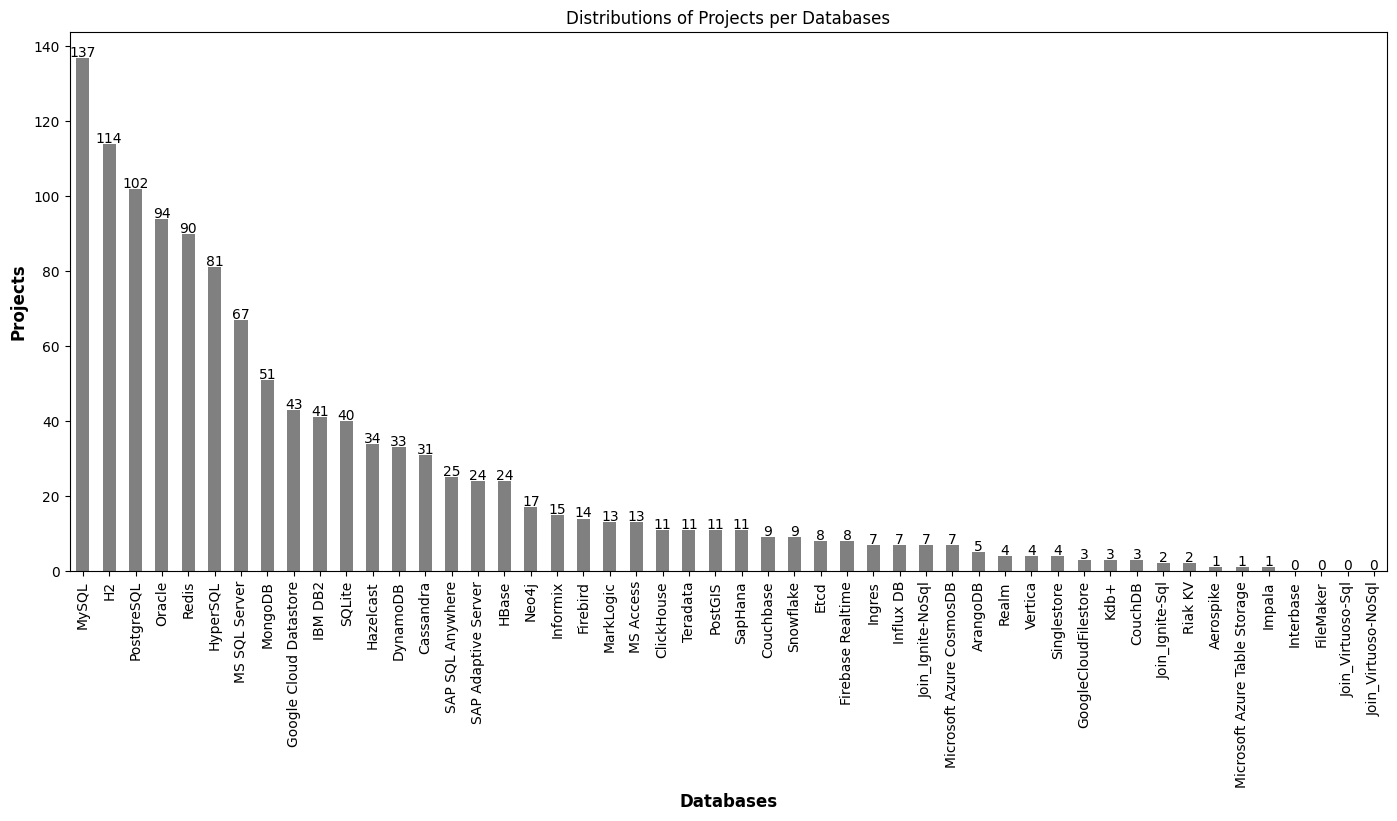

In [20]:
plt.figure(figsize=(17,7))
plot = df2.iloc[: , 2:].apply(num_missing, axis=0).sort_values(ascending=False).plot(kind='bar', title = 'Distributions of Projects per Databases', color='gray')
plt.xlabel("Databases", fontsize=12, fontweight='bold')
plt.ylabel("Projects", fontsize=12,fontweight='bold' )



#plt.show() 
for i in plot.patches:
    plot.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 1),textcoords='offset points')


#plt.savefig(IMAGES_DIR+"/fig9.pdf", format="pdf", bbox_inches="tight")

Number of Projects in which there was indication of use in all versions of the project by Database

In [21]:
def full_commits(x):
   return sum(x == 10)
df2.iloc[: , 2:].apply(full_commits, axis=0).sort_values(ascending=False)
#este código não está correto, cada projeto tem uma quantidade de slices. Precisa ser adaptado.

H2                               3
MySQL                            3
PostgreSQL                       3
Oracle                           2
Redis                            2
HyperSQL                         2
SAP Adaptive Server              1
Hazelcast                        1
Influx DB                        1
IBM DB2                          1
Informix                         1
Google Cloud Datastore           1
SAP SQL Anywhere                 1
Realm                            1
Kdb+                             0
SQLite                           0
Firebase Realtime                0
ClickHouse                       0
SapHana                          0
HBase                            0
MongoDB                          0
Firebird                         0
Cassandra                        0
Couchbase                        0
Etcd                             0
PostGIS                          0
Join_Ignite-Sql                  0
Join_Ignite-NoSql                0
Join_Virtuoso-Sql   

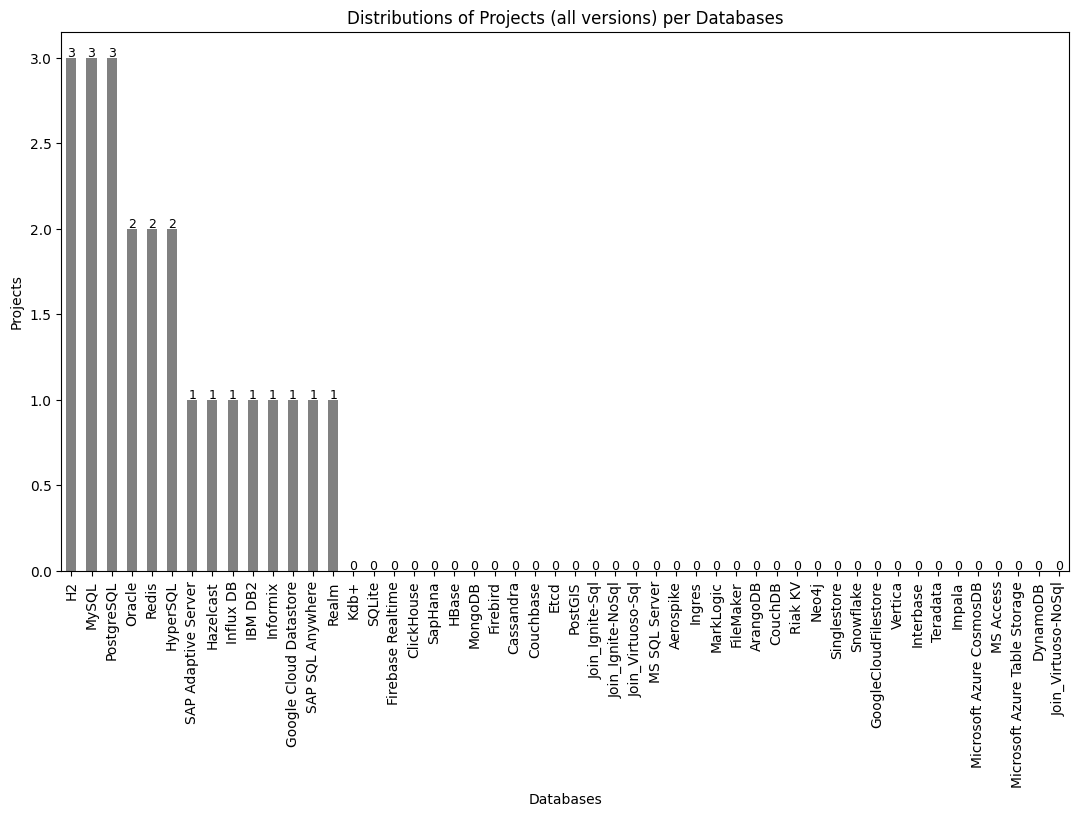

In [22]:
plt.figure(figsize=(13,7))
plot = df2.iloc[: , 2:].apply(full_commits, axis=0).sort_values(ascending=False).plot(kind='bar', title = 'Distributions of Projects (all versions) per Databases', color='gray')
plt.xlabel("Databases")
plt.ylabel("Projects")
#plt.show()
for i in plot.patches:
    plot.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 1),textcoords='offset points')

Number of Projects in which there was an indication of use in some of the versions of projects by Database

In [23]:
def less_commits(x):
   #return sum(x/10)
   return sum(x % 10 != 0 )
df2.iloc[: , 2:].apply(less_commits, axis=0).sort_values(ascending=False)

MySQL                            123
H2                                96
PostgreSQL                        91
Oracle                            83
Redis                             79
HyperSQL                          74
MS SQL Server                     62
MongoDB                           45
Google Cloud Datastore            39
IBM DB2                           38
SQLite                            38
Hazelcast                         31
Cassandra                         30
DynamoDB                          29
SAP SQL Anywhere                  22
HBase                             22
SAP Adaptive Server               21
Neo4j                             17
Firebird                          14
MS Access                         13
Informix                          13
PostGIS                           11
Teradata                          10
SapHana                           10
MarkLogic                         10
Snowflake                          9
ClickHouse                         9
F

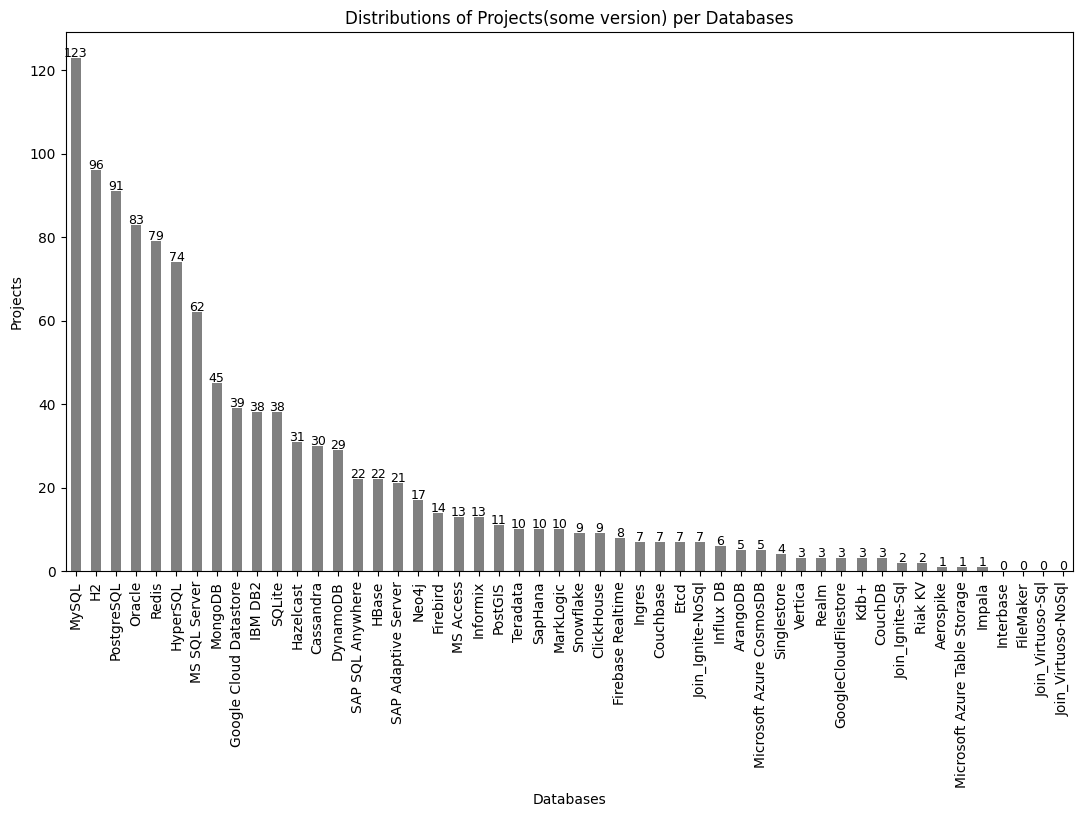

In [24]:
plt.figure(figsize=(13,7))
plot = df2.iloc[: , 2:].apply(less_commits, axis=0).sort_values(ascending=False).plot(kind='bar', title = 'Distributions of Projects(some version) per Databases', color = 'gray')
plt.xlabel("Databases")
plt.ylabel("Projects")
#plt.show() 
for i in plot.patches:
    plot.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 1),textcoords='offset points')

# TODO: Eu (Joao) parei de ajustar aqui

In [25]:
df3 = pd.read_excel(RESOURCE_DIR + os.sep +'historical_join_db.xlsx', keep_default_na=False)
#df3 = pd.read_excel(RESOURCE_DIR + os.sep +'historical_join_db (1).xlsx', keep_default_na=False)
#df3['Projects'] = df3.iloc[: , 4:].sum(axis=0)
df3
#A raquel faz uma soma no final do arquivo, fazer a soma tmb. Chamar a coluna de Projects

,Databases,Primary Model,Second Model,Model,Activiti,Android-IMSI-Catcher-Detector,AndroidUtilCode,AntennaPod,AnySoftKeyboard,Apktool,...,webdrivermanager,wildfly,xxl-job,yacy_search_server,zaproxy,zeppelin,zipkin,zookeeper,zxing,zxing-android-embedded
0,Aerospike,Key-value,Multi-model,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ArangoDB,Multi-Model,,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cassandra,Wide column,,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,38,25,0,0,0
3,ClickHouse,Relational,Multi-model,SQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Couchbase,Document,Multi-model,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,CouchDB,Document,Multi-model,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,DynamoDB,Multi-model,,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Etcd,Key-value,,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,FileMaker,Relational,,SQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Firebase Realtime,Document,,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:

df3['Model'].replace({'SQL': 'Relational'}, regex=True, inplace=True)
df3['Model'].replace({'NoRelational': 'Non Relational'}, regex=True, inplace=True)
#df3.set_index(list(df.columns[[4]]))
#df3['Projects'] = (df3.loc[4:] > 0).count()
#print(df.iloc[:,4:]) #df3[df3.iloc [:,4:] >0].count()
df3
historical_join_db = df3.copy()


In [29]:
df3

,Databases,Primary Model,Second Model,Model,Activiti,Android-IMSI-Catcher-Detector,AndroidUtilCode,AntennaPod,AnySoftKeyboard,Apktool,...,webdrivermanager,wildfly,xxl-job,yacy_search_server,zaproxy,zeppelin,zipkin,zookeeper,zxing,zxing-android-embedded
0,Aerospike,Key-value,Multi-model,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ArangoDB,Multi-Model,,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cassandra,Wide column,,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,38,25,0,0,0
3,ClickHouse,Relational,Multi-model,Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Couchbase,Document,Multi-model,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,CouchDB,Document,Multi-model,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,DynamoDB,Multi-model,,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Etcd,Key-value,,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,FileMaker,Relational,,Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Firebase Realtime,Document,,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


KeyError: 'Projects'

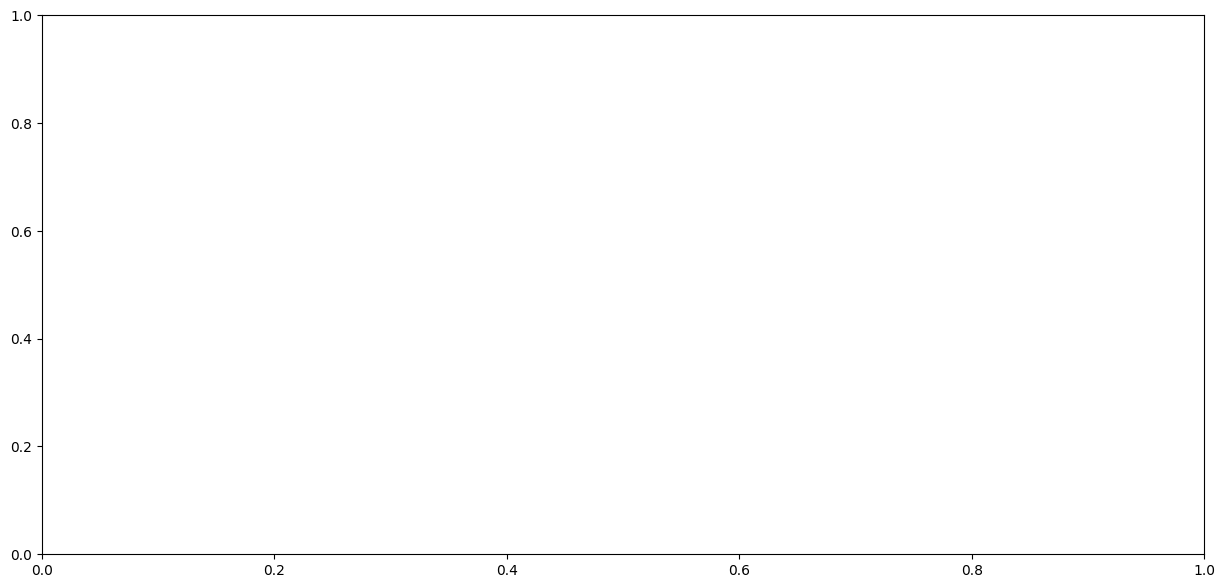

In [28]:
colors = {'Relational':'silver','Non Relational':'gray'}
c = df3['Model'].apply(lambda x: colors[x])

plt.figure(figsize=(15,7))
ax = plt.subplot(111) #specify a subplot

bars = ax.bar(df3['Databases'], df3['Projects'], color=c ) #Plot data on subplot axis
#plot = df3.plot(kind='bar', x ='Databases', y ='Projects', title = 'Distributions of Projects per Databases', color=c)
for i, j in colors.items(): #Loop over color dictionary
    ax.bar(df3['Databases'], df3['Projects'],width=0,color=j,label=i) #Plot invisible bar graph but have the legends specified

plt.xlabel("Databases", fontweight = 'bold', fontsize=12)
plt.ylabel("Amount of Projects", fontweight = 'bold', fontsize=12)
#plt.title('Distributions of Projects per Databases classify by Models')
ax.legend()
plt.xticks(rotation=90)
#plt.show()
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 1),textcoords='offset points')

#plt.savefig(IMAGES_DIR+"/fig9.pdf", format="pdf", bbox_inches="tight")
plt.show()

/var/folders/kc/q64njxfx5xj09h4nrxwncwbw0000gn/T/ipykernel_19171/3470796308.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Amount of Projects'] = df5['Relational'] + df5['Non Relational']


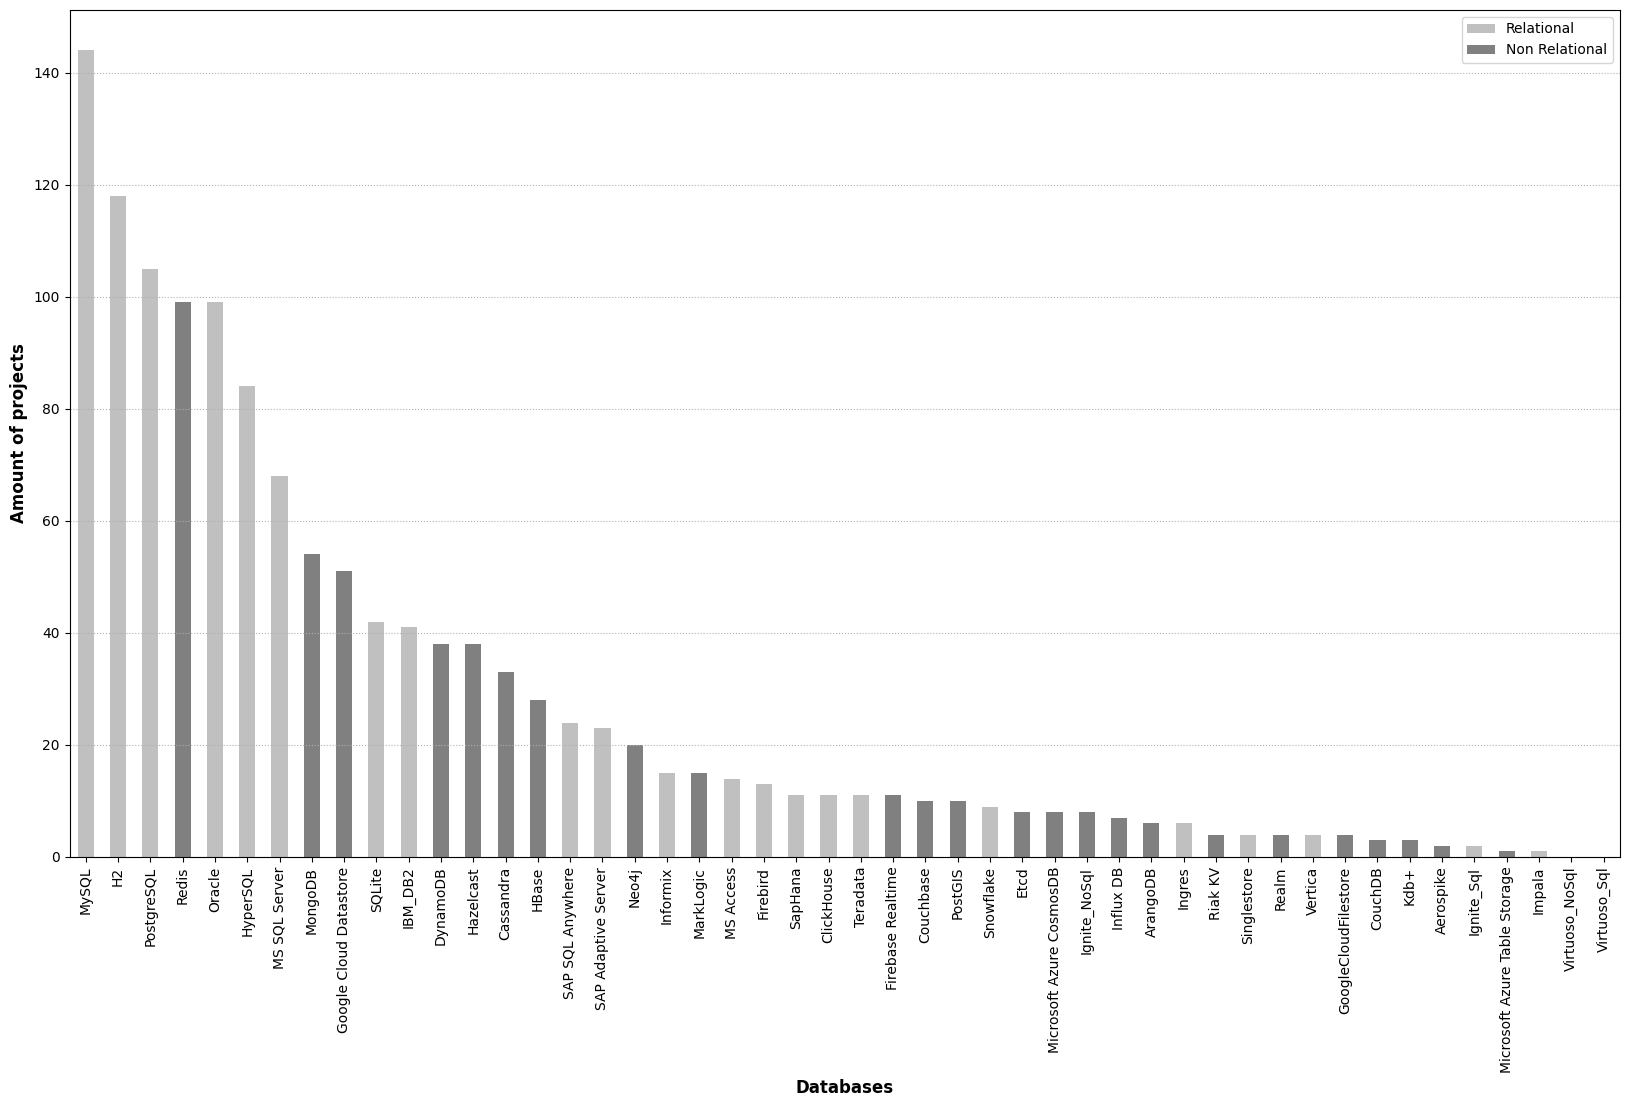

In [29]:
new_df = df3.copy()

# Supondo que seu DataFrame seja chamado df
df_grouped = new_df.groupby(['Databases'])['Projects'].sum().reset_index()

# Agrupando novamente para separar 'Relational' e 'Non_Relational'
df_grouped = new_df.groupby(['Databases', 'Model'])['Projects'].sum().reset_index()


# Criando a coluna 'Relational' e 'Non_Relational'
df_grouped['Relational'] = df_grouped.apply(lambda row: row['Projects'] if row['Model'] == 'Relational' else 0, axis=1)
df_grouped['Non Relational'] = df_grouped.apply(lambda row: row['Projects'] if row['Model'] == 'Non Relational' else 0, axis=1)

# Alterando o valor do Ignite, Virtuoso e Marklogic
#new_row = pd.DataFrame({'Databases': ['Ignite'], 'Model': ['Multi-Model'], 'Projects': [4], 'Relational': [1], 'Non Relational': [3]})
#new_row2 = pd.DataFrame({'Databases': ['Virtuoso'], 'Model': ['Multi-Model'], 'Projects': [0], 'Relational': [0], 'Non Relational': [0]})
#new_row3 = pd.DataFrame({'Databases': ['MarkLogic'], 'Model': ['Multi-Model'], 'Projects': [0], 'Relational': [0], 'Non Relational': [0]})

# Adicionando as novas linhas com Ignite, Virtuoso e MarkLogica
#df_grouped = pd.concat([df_grouped,new_row], ignore_index=True)
#df_grouped = pd.concat([df_grouped,new_row2], ignore_index=True)
#df_grouped = pd.concat([df_grouped,new_row3], ignore_index=True)


# Removendo o Ignite_sql, Ignite_NoSql...
#df_grouped = df_grouped.drop(index = [48, 49, 18, 19]) #mudar quando gerar uma nova planilha

df_grouped = df_grouped.reset_index(drop=True)


# Cirando um novo df para facilitar a criação do gráfico
df5 = df_grouped[['Databases', 'Relational', 'Non Relational']]

df5['Amount of Projects'] = df5['Relational'] + df5['Non Relational']

df5 = df5.sort_values(by='Amount of Projects', ascending=False)

# Definindo a paleta de cores
plt.rc('axes', prop_cycle=plt.cycler('color', ['silver', 'gray']))

ax = df5.plot(x='Databases', y=['Relational', 'Non Relational'], kind='bar', stacked=True, figsize=(20,11))

# Personalizando o gráfico
ax.set_xlabel("Databases", fontsize=12, fontweight = 'bold')
ax.set_ylabel("Amount of projects", fontsize=12, fontweight = 'bold')
#Incluído para mostrar os valores das barras
ax.legend()
#ticks = ['']
#plt.xticks(y, ticks)
plt.xticks(rotation=90)
#plt.show()
#for i in ax.patches:
#    if i.get_height() != 0:
#        ax.annotate(int(i.get_height()),(i.get_x() + i.get_width() / 2, i.get_height()),
#        ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 1),textcoords='offset points')

plt.grid(axis='y', linestyle=':', linewidth=0.8)

plt.savefig(IMAGES_DIR+"/fig9.pdf", format="pdf", bbox_inches="tight")
plt.show()

This dataframe shows the databases that remained and those that left. It was generated from the filter run in the Pattern counter tool with the following command: $patterncounter convert -f input_sequencial_init_in_out.txt | patterncounter count --csv -n "OutX" -v X + "~OutX" -v X + "$X" -v X >> countpatterns_OutX_notOutx_Xlastslice.csv

Out X -> Filters out the BDs that have left
$X -> Filters the Bds that remained in the last slice despite removals and reinsertions
~Out X -> Filters out the DBs that have not left.


In [30]:
df4 = pd.read_excel(HISTORICAL_DB_KEEP_OUT, keep_default_na=False) #esta parte não esta atualizada, não alterei este arquivo: HISTORICAL_DB_KEEP_OUT
len(df4)
df4

,Databases,Source,Lines
0,MySQL,OutX -v X,31
1,PostgreSQL,OutX -v X,22
2,SQLite,OutX -v X,14
3,Ehcache,OutX -v X,17
4,DynamoDB,OutX -v X,4
...,...,...,...
124,PostGIS,$X -v X,6
125,Netezza,$X -v X,3
126,OrientDB,$X -v X,3
127,Impala,$X -v X,1


In [31]:
df4['Source'].replace({'OutX -v X':'Removed'}, regex=True, inplace=True)
#df4['Source'].replace({'Removed': 'Kept'}, regex=True, inplace=True)
df4

,Databases,Source,Lines
0,MySQL,Removed,31
1,PostgreSQL,Removed,22
2,SQLite,Removed,14
3,Ehcache,Removed,17
4,DynamoDB,Removed,4
...,...,...,...
124,PostGIS,$X -v X,6
125,Netezza,$X -v X,3
126,OrientDB,$X -v X,3
127,Impala,$X -v X,1


In [32]:
#df5 = df.copy()
df5 = df4.query("Source != '$X -v X'")
df5['Source'].replace({'~Removed': 'Kept'}, regex=True, inplace=True)
df5

/var/folders/kc/q64njxfx5xj09h4nrxwncwbw0000gn/T/ipykernel_19171/2473066294.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Source'].replace({'~Removed': 'Kept'}, regex=True, inplace=True)


,Databases,Source,Lines
0,MySQL,Removed,31
1,PostgreSQL,Removed,22
2,SQLite,Removed,14
3,Ehcache,Removed,17
4,DynamoDB,Removed,4
...,...,...,...
77,PostGIS,Kept,6
78,Netezza,Kept,3
79,OrientDB,Kept,3
80,Impala,Kept,1


In [33]:
df5.rename(columns={'Lines': 'Amount of Projects', 'Source':'Legend'}, inplace=True)

df5

/var/folders/kc/q64njxfx5xj09h4nrxwncwbw0000gn/T/ipykernel_19171/2910628385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.rename(columns={'Lines': 'Amount of Projects', 'Source':'Legend'}, inplace=True)


,Databases,Legend,Amount of Projects
0,MySQL,Removed,31
1,PostgreSQL,Removed,22
2,SQLite,Removed,14
3,Ehcache,Removed,17
4,DynamoDB,Removed,4
...,...,...,...
77,PostGIS,Kept,6
78,Netezza,Kept,3
79,OrientDB,Kept,3
80,Impala,Kept,1


In [34]:
df5 = df5.sort_values(['Amount of Projects'], ascending=[False])
#df5 = df5.groupby(['Databases','Legend']).mean().sort_values(['Amount of Projects',], ascending=[False])
df5

,Databases,Legend,Amount of Projects
36,MySQL,Kept,76
37,PostgreSQL,Kept,52
38,H2,Kept,51
39,Oracle,Kept,48
40,Redis,Kept,45
...,...,...,...
14,GoogleBigQuery,Removed,1
33,PostGIS,Removed,1
32,Teradata,Removed,1
31,Hive,Removed,1


In [35]:
#df5.rename(columns={'Lines': 'Amount of Projects', 'Source':'Legend'}, inplace=True)
df5['Databases'].replace({'Join_Ignite': 'Ignite'}, regex=True, inplace=True)

This graph shows the databases that remained despite removals and reinsertions and the databases that left.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

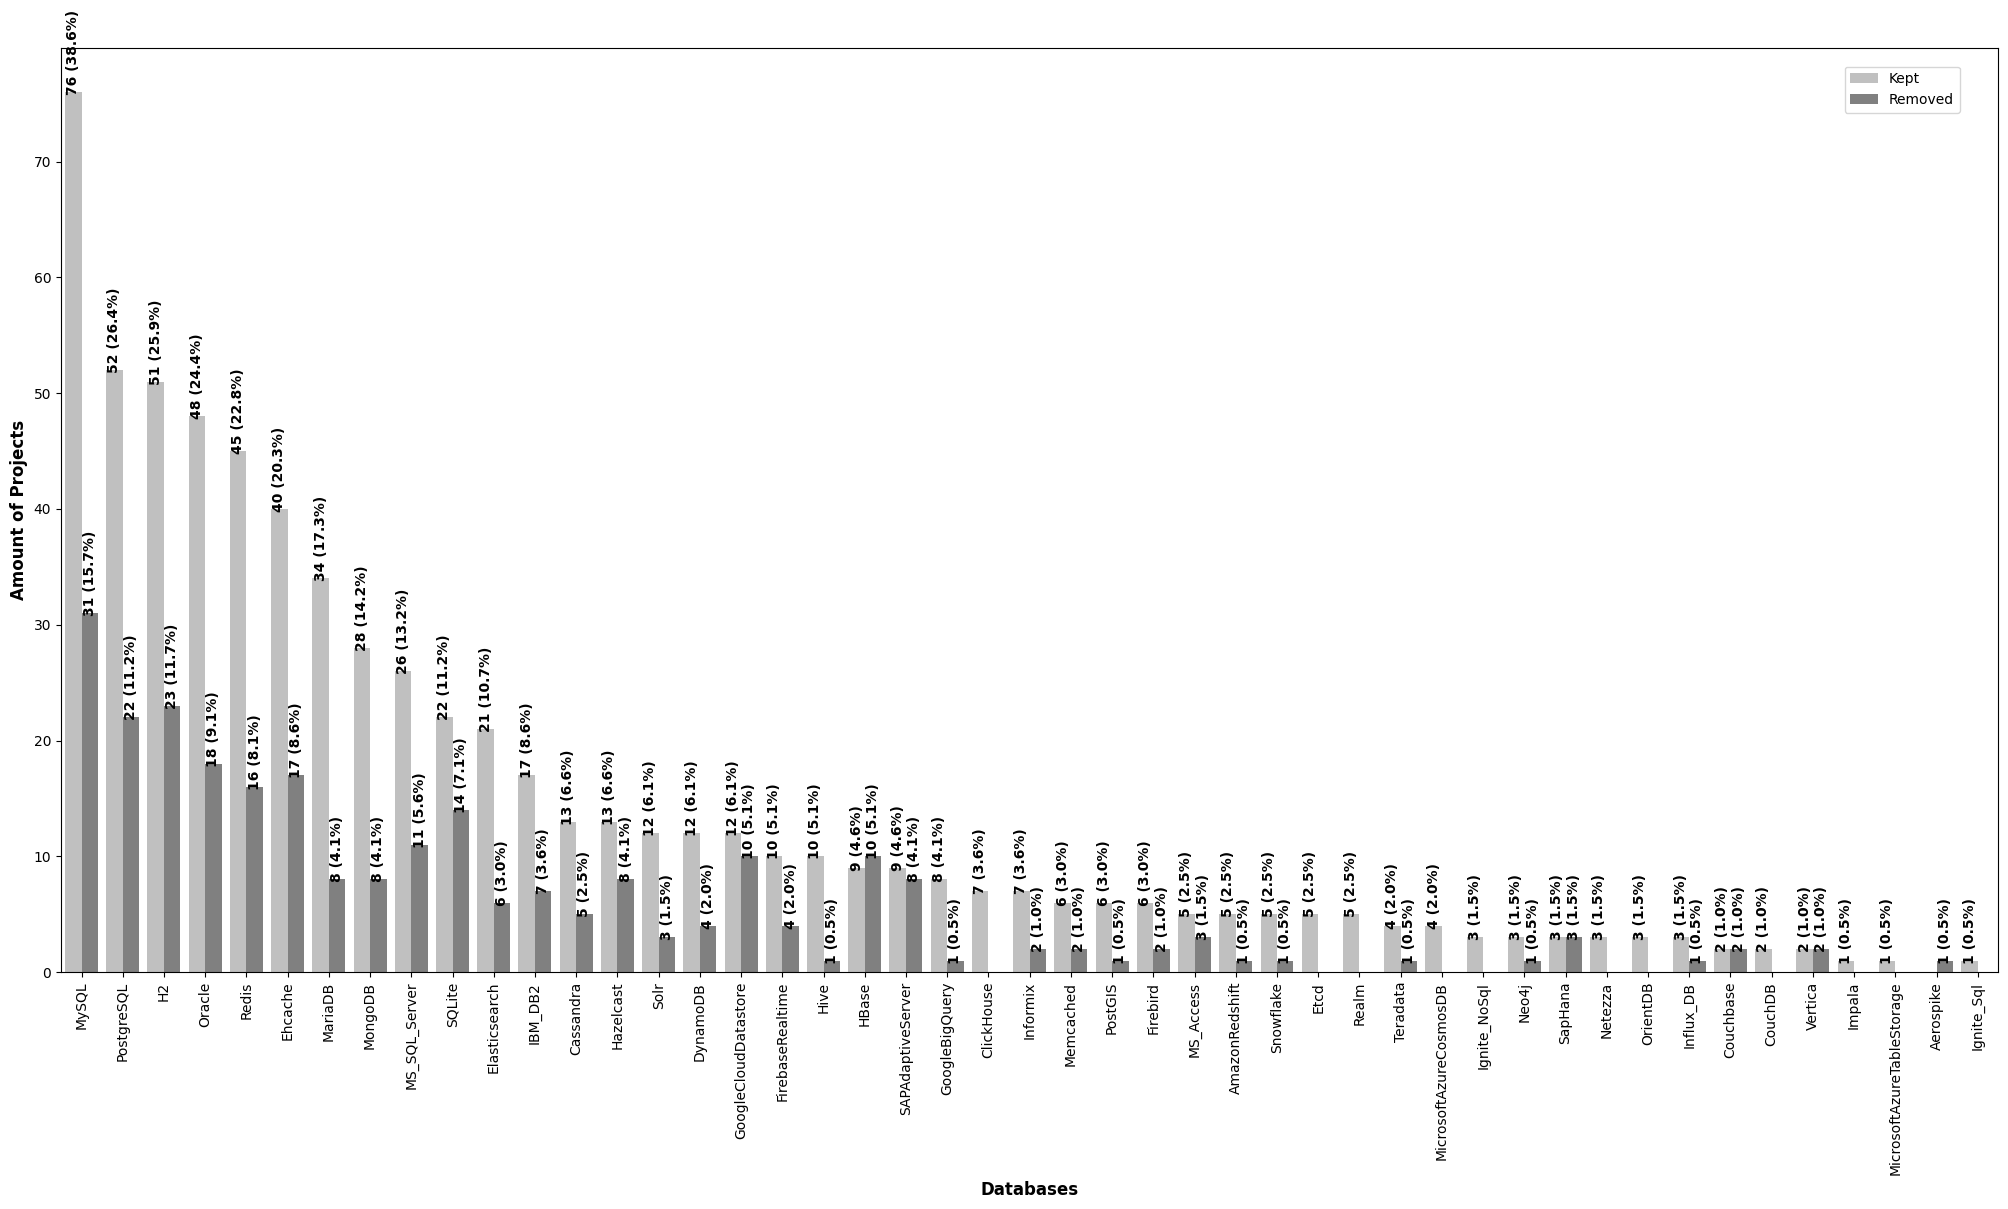

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

sizeCorus = 197

plt.figure(figsize=(25, 12))

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            height = p.get_height()
            percent = 100 * height / sizeCorus
            #value = '{:.1f}'.format(percent)
            value = '{:.0f} ({:.1f}%)'.format(height, percent)
            ax.text(_x, _y, value, ha="center", fontsize = 10, fontweight='bold', rotation=90)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
        
# create grouped bar chart
p = sns.barplot(x='Databases', y='Amount of Projects', hue='Legend', data=df5, palette=["Silver", "gray"])

# add axis titles
plt.xlabel('Databases', fontsize=12, fontweight='bold')
plt.ylabel('Amount of Projects', fontsize=12, fontweight='bold')

# add values to bars
show_values_on_bars(p)

# add legend
plt.legend(bbox_to_anchor=(0.98, 0.98), loc='upper right', borderaxespad=0.)

# rotate x-axis labels
plt.xticks(rotation=90)
#plt.yticks(range(0, 30, 10), fontsize=12)

plt.savefig(IMAGES_DIR+"/fig15.pdf", format="pdf", bbox_inches="tight")
# show plot
plt.show()

In [37]:
historical_join_db

,Databases,Primary Model,Second Model,Model,Activiti,AmazeFileManager,Android-IMSI-Catcher-Detector,AndroidUtilCode,AntennaPod,AnySoftKeyboard,...,xxl-job,yacy_search_server,zaproxy,zeppelin,zipkin,zookeeper,zotfile,zxing,zxing-android-embedded,Projects
0,Aerospike,Key-value,Multi-model,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,ArangoDB,Multi-Model,,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2,Cassandra,Wide column,,Non Relational,0,0,0,0,0,0,...,0,0,0,51,41,0,0,0,0,33
3,ClickHouse,Relational,Multi-model,Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
4,Couchbase,Document,Multi-model,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
5,CouchDB,Document,Multi-model,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6,DynamoDB,Multi-model,,Non Relational,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,38
7,Etcd,Key-value,,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
8,Firebase Realtime,Document,,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
9,Firebird,Relational,,Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13


In [38]:
result_databases_models = historical_join_db
organizing_per_model = result_databases_models.groupby(['Model']).sum()
organizing_per_model = organizing_per_model.mask(organizing_per_model > 0, True)
organizing_per_model = organizing_per_model.mask(organizing_per_model == 0, False)
organizing_per_model = organizing_per_model.transpose()
organizing_per_model = organizing_per_model.drop('Projects', axis = 0)
organizing_per_model = organizing_per_model.rename(columns={'Non Relational': 'NoSQL', 'Relational':'SQL'})
organizing_per_model

Model,NoSQL,SQL
Activiti,True,True
AmazeFileManager,False,False
Android-IMSI-Catcher-Detector,True,False
AndroidUtilCode,True,False
AntennaPod,False,False
...,...,...
zipkin,True,True
zookeeper,False,True
zotfile,False,False
zxing,False,False


In [39]:
relational = pd.DataFrame(data = organizing_per_model.SQL)
nonRelational = pd.DataFrame(data = organizing_per_model.NoSQL)
relational.reset_index(inplace=True)
nonRelational.reset_index(inplace=True)

relational = relational.rename(columns={'index' : 'Projects'})
nonRelational = nonRelational.rename(columns={'index' : 'Projects'})

In [40]:
models_of_database_per_project = pd.merge(relational, nonRelational, left_on='Projects', right_on='Projects')

def identify_model (row):
    if (row['SQL'] and row['NoSQL']):
        return 'Multi-Model'
    else:
        if(row['SQL']):
            return 'Relational'
        if(row['NoSQL']):
            return 'NoSQL'

models_of_database_per_project['Model'] = models_of_database_per_project.apply(lambda row: identify_model(row), axis= 1)


models_of_database_per_project[models_of_database_per_project['Model'].isnull()]
models_of_database_per_project.dropna(subset=['Model'], inplace= True)
models_of_database_per_project.to_excel('modelsTeste.xlsx')

In [41]:
from util import ANNOTATED_FILE_JAVA
annotated_java = pd.read_excel(ANNOTATED_FILE_JAVA)
characterization_of_projects = pd.merge(models_of_database_per_project, annotated_java, left_on= 'Projects', right_on='name')
characterization_of_projects.drop(characterization_of_projects.index[33], inplace= True)
characterization_of_projects

,Projects,SQL,NoSQL,Model,owner,name,createdAt,pushedAt,isMirror,diskUsage,...,commits,pullRequests,branches,tags,releases,url,description,isSoftware,discardReason,domain
0,Activiti,True,True,Multi-Model,Activiti,Activiti,2012-09-13 11:34:43,2019-08-23 12:02:11,False,95935,...,8458,1411,74,263,23,http://www.github.com/Activiti/Activiti,Activiti is a light-weight workflow and Busine...,Y,NaN,Enterprise Resource Planning
1,Android-IMSI-Catcher-Detector,False,True,NoSQL,CellularPrivacy,Android-IMSI-Catcher-Detector,2013-11-23 10:04:14,2019-08-13 15:22:57,False,10897,...,2583,344,6,49,48,http://www.github.com/CellularPrivacy/Android-...,"AIMSICD • Fight IMSI-Catcher, StingRay and sil...",Y,NaN,Security
2,AndroidUtilCode,False,True,NoSQL,Blankj,AndroidUtilCode,2016-07-30 18:18:32,2019-08-16 09:39:06,False,45937,...,1211,150,37,110,110,http://www.github.com/Blankj/AndroidUtilCode,:fire: Android developers should collect the f...,Y,NaN,Software Development
3,AnySoftKeyboard,True,False,Relational,AnySoftKeyboard,AnySoftKeyboard,2012-04-18 12:38:01,2019-08-21 16:43:46,False,131594,...,4558,556,15,93,41,http://www.github.com/AnySoftKeyboard/AnySoftK...,Android (f/w 2.1+) on screen keyboard for mult...,Y,NaN,Other
4,AsciidocFX,True,True,Multi-Model,asciidocfx,AsciidocFX,2014-05-18 17:49:13,2019-08-05 22:55:08,False,145073,...,1566,53,29,73,73,http://www.github.com/asciidocfx/AsciidocFX,Asciidoc Editor and Toolchain written with Jav...,Y,NaN,Media
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,yacy_search_server,True,True,Multi-Model,yacy,yacy_search_server,2015-03-22 12:54:20,2019-07-17 07:36:46,False,742164,...,13922,92,1,20,0,http://www.github.com/yacy/yacy_search_server,Distributed Peer-to-Peer Web Search Engine and...,Y,NaN,Infrastructure Management
242,zaproxy,True,False,Relational,zaproxy,zaproxy,2015-06-03 16:55:01,2019-08-22 07:24:00,False,181083,...,6980,2103,3,227,124,http://www.github.com/zaproxy/zaproxy,The OWASP ZAP core project,Y,NaN,Security
243,zeppelin,True,True,Multi-Model,apache,zeppelin,2015-03-25 07:00:06,2019-08-23 08:18:53,True,75180,...,4154,3429,11,15,0,http://www.github.com/apache/zeppelin,Mirror of Apache Zeppelin,Y,NaN,Data Management
244,zipkin,True,True,Multi-Model,openzipkin,zipkin,2012-06-06 18:26:16,2019-08-23 11:36:31,False,48583,...,2134,1728,41,184,53,http://www.github.com/openzipkin/zipkin,Zipkin is a distributed tracing system,Y,NaN,Monitoring


In [42]:
characterization_of_projects['domain'] = characterization_of_projects['domain'].str.replace('gestão pessoal', 'personal management')

In [43]:
characterization_of_projects['domain'].value_counts()

Data Management                 62
Software Development            54
Infrastructure Management       26
Security                        16
Automation                      13
Program Analysis                12
Monitoring                      12
Network                          8
Enterprise Resource Planning     7
Collaboration                    6
Artificial Intelligence          6
Game                             5
Media                            5
File Management                  3
Other                            3
Cryptocurrency                   2
Finances                         1
Personal Management              1
Artificial Intelligence          1
infrastructure Management        1
Name: domain, dtype: int64

In [44]:
projects_with_db_relational = characterization_of_projects['Model'] == 'Relational'
projects_with_db_NoSQL = characterization_of_projects['Model'] == 'NoSQL'
projects_with_db_multimodel = characterization_of_projects['Model'] == "Multi-Model"

projects_with_db_relational = characterization_of_projects[projects_with_db_relational]
projects_with_db_NoSQL = characterization_of_projects[projects_with_db_NoSQL]
projects_with_db_multimodel = characterization_of_projects[projects_with_db_multimodel]

In [48]:
selecaoR = projects_with_db_relational['domain'].value_counts()
selecaoR = pd.DataFrame(data=selecaoR)
selecaoR.reset_index(inplace= True)
selecaoR.rename(columns={'domain' : 'amount'})
print(selecaoR)

                           index  domain
0           Software Development      23
1                Data Management      14
2               Program Analysis       6
3      Infrastructure Management       4
4   Enterprise Resource Planning       3
5                           Game       3
6                       Security       3
7                     Automation       3
8                          Media       2
9       Artificial Intelligence        2
10                         Other       1
11       Artificial Intelligence       1
12                Cryptocurrency       1
13                 Collaboration       1
14                    Monitoring       1


In [49]:
selecaoNR = projects_with_db_NoSQL['domain'].value_counts()
selecaoNR = pd.DataFrame(data=selecaoNR)
selecaoNR.reset_index(inplace= True)
selecaoNR.rename(columns={'domain' : 'amount'})
print(selecaoNR)

                        index  domain
0        Software Development      10
1             Data Management       7
2   Infrastructure Management       6
3                    Security       4
4                     Network       2
5                       Other       2
6                  Monitoring       2
7                  Automation       1
8                       Media       1
9            Program Analysis       1
10   Artificial Intelligence        1


In [50]:
selecaoM = projects_with_db_multimodel['domain'].value_counts()
selecaoM = pd.DataFrame(data=selecaoM)
selecaoM.reset_index(inplace= True)
selecaoM.rename(columns={'domain' : 'amount'})
print(selecaoM)

                           index  domain
0                Data Management      41
1           Software Development      21
2      Infrastructure Management      16
3                     Monitoring       9
4                       Security       9
5                     Automation       9
6                        Network       6
7                  Collaboration       5
8               Program Analysis       5
9   Enterprise Resource Planning       4
10      Artificial Intelligence        3
11               File Management       3
12                         Media       2
13                          Game       2
14                Cryptocurrency       1
15                      Finances       1
16           Personal Management       1
17     infrastructure Management       1


In [51]:
M = {'Data Management':41,
     'Software Development':21,
     'Infrastructure Management': 17,
     'Monitoring': 9,
     'Security': 9,
     'Automation': 9,
     'Network': 6,
     'Collaboration': 5,
     'Program Analysis': 5,
     'Enterprise Resource Planning': 4,
     'Artificial Intelligence': 3,
     'File Management': 3,
     'Media': 2,
     'Game': 2,
     'Cryptocurrency': 1,
     'Finances': 1,
     'Personal Management': 1
}

NR = {'Software Development':10,
      'Data Management': 7,
      'Infrastructure Management':6,
      'Security': 4,
      'Network':2,
      'Other':2,
      'Monitoring': 2,
      'Automation':1,
      'Media':1,
      'Program Analysis':1,
      'Artificial Intelligence':1}

In [52]:
teste = pd.concat([selecaoR['index'], selecaoNR['index'], selecaoM['index']]).unique()
table = pd.DataFrame(data=teste, columns = ['domain'])
table['Relational'] = selecaoR['domain']
table['NoSQL'] = 'NaN'
table['Multi-Model'] = ''
table

,domain,Relational,NoSQL,Multi-Model
0,Software Development,23.0,NaN,
1,Data Management,14.0,NaN,
2,Program Analysis,6.0,NaN,
3,Infrastructure Management,4.0,NaN,
4,Enterprise Resource Planning,3.0,NaN,
5,Game,3.0,NaN,
6,Security,3.0,NaN,
7,Automation,3.0,NaN,
8,Media,2.0,NaN,
9,Artificial Intelligence,2.0,NaN,


In [53]:
#quando gera aqui, ele busca do DF que está construído na celula anterior, mudar a célula
table['NoSQL'] = table['domain'].map(NR)
table['Multi-Model'] = table['domain'].map(M)
table = table.fillna(0)
table = table.astype({'Relational':'int', 'NoSQL': 'int', 'Multi-Model': 'int'})
table = table.rename(columns = {'domain' : 'Domain'})
table['Total'] = table['Relational'] + table['NoSQL'] + table['Multi-Model']
sorted_table = table.sort_values(by='Total', ascending=False)

df = pd.DataFrame(table)
sorted_df = df.sort_values(by='Total', ascending=False)
sorted_df

table = sorted_df
table

,Domain,Relational,NoSQL,Multi-Model,Total
1,Data Management,14,7,41,62
0,Software Development,23,10,21,54
3,Infrastructure Management,4,6,17,27
6,Security,3,4,9,16
7,Automation,3,1,9,13
14,Monitoring,1,2,9,12
2,Program Analysis,6,1,5,12
15,Network,0,2,6,8
4,Enterprise Resource Planning,3,0,4,7
13,Collaboration,1,0,5,6


In [54]:
table.drop('Total', axis=1, inplace=True)

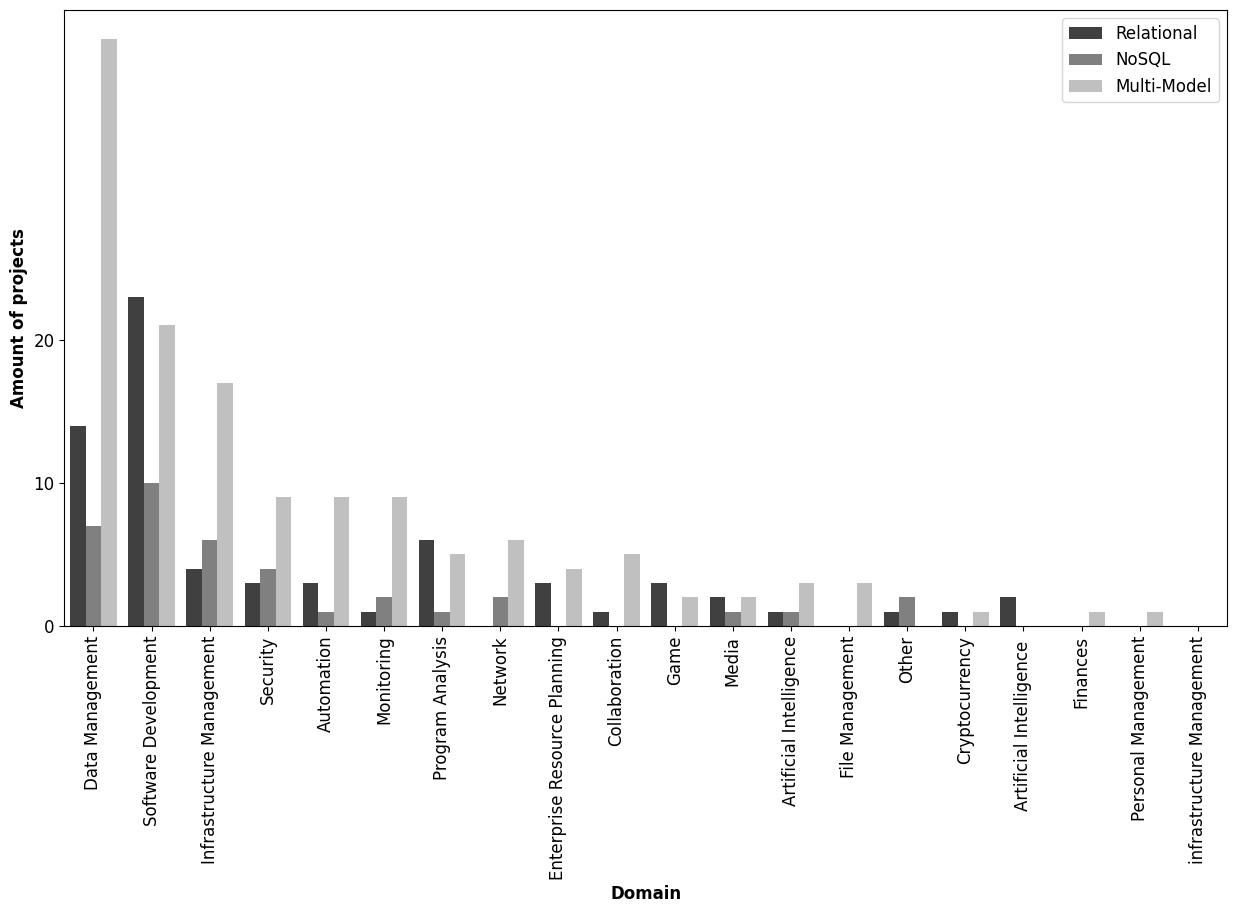

In [55]:
fig = plt.figure(figsize= (15, 8))

domain_perfil = sns.barplot(data=table.melt(id_vars='Domain', value_name='Amount of projects', var_name='Model'), x='Domain', y='Amount of projects', hue='Model', palette='gray')
domain_perfil.set_xticklabels(table['Domain'],rotation = 90, fontsize = 12)
domain_perfil.set_xlabel("Domain",fontsize = 12, fontweight = 'bold')
domain_perfil.set_ylabel("Amount of projects",fontsize = 12, fontweight = 'bold')
plt.yticks(range(0, 30, 10), fontsize=12)
domain_perfil.legend(fontsize = 12)
plt.savefig(IMAGES_DIR+"/fig11.pdf", format="pdf", bbox_inches="tight")